<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/Public_Lands_in_NHBP_Ceded_Territories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyter nbconvert --output-dir='/content/drive/My Drive/Colab Notebooks/OUTPUTS' --to html --no-input '/content/drive/My Drive/Colab Notebooks/Public Lands in NHBP Ceded Territories.ipynb' 

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Public Lands in NHBP Ceded Territories.ipynb to html
[NbConvertApp] Writing 831538 bytes to /content/drive/My Drive/Colab Notebooks/OUTPUTS/Public Lands in NHBP Ceded Territories.html


## Pandas Working Area

In [ ]:
gdfExport.head().T

,0,1,2,3,4
CARL_MGR,State,County,Local,State,County
CARL_OWN,State,County,County,State,County
acres,89.2755,388.168,32.8213,648.173,1.69345
category,Fee,Fee,Fee,Fee,Fee
mgmt_desc,Nature Preserve,Park,Park,Botanical/Arboretum Garden,Park
mgmt_type,Conservation,Recreation,Recreation,Conservation,Recreation
state_nm,Indiana,Indiana,Indiana,Michigan,Michigan
mgr_name,State Department of Natural Resources,County Land,City Land,Other or Unknown State Land,County Land
own_name,State Department of Natural Resources,County Land,County Land,Other or Unknown State Land,County Land


In [ ]:
gdfExport.sum()

CARL_MGR     StateCountyLocalStateCountyStateStateStateStat...
CARL_OWN     StateCountyCountyStateCountyStateStateStateSta...
acres                                              1.51608e+06
category     FeeFeeFeeFeeFeeFeeFeeFeeFeeFeeFeeFeeFeeFeeFeeF...
mgmt_desc    Nature PreserveParkParkBotanical/Arboretum Gar...
mgmt_type    ConservationRecreationRecreationConservationRe...
state_nm     IndianaIndianaIndianaMichiganMichiganMichiganM...
mgr_name     State Department of Natural ResourcesCounty La...
own_name     State Department of Natural ResourcesCounty La...
dtype: object

In [ ]:
pd.value_counts(gdfExport['acres']).plot.bar()

In [ ]:
gdfExport['CARL_OWN'].describe()

count      3978
unique        7
top       Local
freq       2515
Name: CARL_OWN, dtype: object

In [ ]:
gdfExport.info()

In [ ]:
gdfExport.mgmt_type.value_counts()

Recreation      3052
Conservation     633
Other            293
Name: mgmt_type, dtype: int64

In [ ]:
gdfExport['acres'].sum()

1516082.1509340901

In [ ]:
gdfExport[["CARL_OWN", "acres"]].groupby("CARL_OWN").mean()

,acres
CARL_OWN,
County,179.130274
Federal,90424.231364
Local,32.161227
NGO,98.688335
Private,118.770705
State,1008.026787
Unknown,110.915314


In [ ]:
gdfExport

,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name
0,State,State,89.275536,Fee,Nature Preserve,Conservation,Indiana,State Department of Natural Resources,State Department of Natural Resources
1,County,County,388.168381,Fee,Park,Recreation,Indiana,County Land,County Land
2,Local,County,32.821328,Fee,Park,Recreation,Indiana,City Land,County Land
3,State,State,648.172953,Fee,Botanical/Arboretum Garden,Conservation,Michigan,Other or Unknown State Land,Other or Unknown State Land
4,County,County,1.693454,Fee,Park,Recreation,Michigan,County Land,County Land
...,...,...,...,...,...,...,...,...,...
3973,Local,Local,13.517780,Fee,Park,Recreation,Michigan,City Land,City Land
3974,Local,Local,53.760295,Fee,Park,Recreation,Michigan,City Land,City Land
3975,Local,Local,39.186630,Fee,Park,Recreation,Michigan,City Land,City Land
3976,Local,Local,0.499004,Fee,Park,Recreation,Michigan,City Land,City Land


## Data Processing Area

In [4]:
# Workflow Section
# Get Public Lands Layer, clipped to Treaty Boundaries with ArcGIS Pro
userLogin()
landsID = searchByKeywords(gis, 'Public_Lands')

ArcGIS Online USER ID: ekerney_nhbptribe
PASSWORD: ··········
SUCCESS - CONNECTED TO: ekerney_nhbptribe ACCOUNT as <gis>
GIS @ https://nhbptribe.maps.arcgis.com version:8.3
Additional User Login(YES/NO)? no
YOU MAY NOW PROCEED...
0 - Public_Lands_Ceded - 91e2f78628824ce5a603ce5273857d97 - Service Definition - [] - 2020-11-04 03:53:48
1 - Public_Lands_Ceded - c938edb26766421b9752f21adcd176bc - Shapefile - [] - 2020-11-04 14:09:04
2 - Public_Lands_Ceded - fb6d59f3007846b1af7caf4d4a535bc0 - Feature Service - [] - 2020-11-04 03:54:13
3 - Public_Lands_Ceded - cef8ea9abc6441c4971afcae3d421ae1 - Shapefile - [] - 2020-11-04 15:23:41
4 - Public Land Survey Sections - Michigan - 619403de1fa342ab9e45063bd0675949 - Feature Service - [] - 2017-10-05 16:54:14


In [5]:
# generate GeoDataframe from clipped public lands layer
gdf = FeatServiceToGDF(gis, landsID[2].id)

Downloading: Public_Lands_Ceded to /data directory
Export Format (Shapefile, CSV, GeoJson, KML, Excel): Shapefile
list of Files extracted to: /data/Public_Lands_Ceded
['Conservation_and_Recreation_.shp', 'Conservation_and_Recreation_.cpg', 'Conservation_and_Recreation_.dbf', 'Conservation_and_Recreation_.shx', 'Conservation_and_Recreation_.shp.xml', 'Conservation_and_Recreation_.prj']
GeoDataFrame Returned!


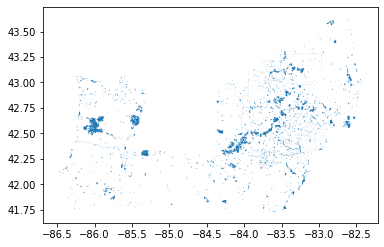

In [6]:
# conversion worked, and was fairly quick
gdf.plot()

In [7]:
# reduce the number of columns
gdfCol = ['CARL_MGR','CARL_OWN','acres','category','mgmt_desc','mgmt_type','state_nm','mgr_name','own_name','geometry']
gdf = gdf[gdfCol]
gdf.head().T

,0,1,2,3,4
CARL_MGR,State,County,Local,State,County
CARL_OWN,State,County,County,State,County
acres,89.2755,388.168,32.8213,648.173,1.69345
category,Fee,Fee,Fee,Fee,Fee
mgmt_desc,Nature Preserve,Park,Park,Botanical/Arboretum Garden,Park
mgmt_type,Conservation,Recreation,Recreation,Conservation,Recreation
state_nm,Indiana,Indiana,Indiana,Michigan,Michigan
mgr_name,State Department of Natural Resources,County Land,City Land,Other or Unknown State Land,County Land
own_name,State Department of Natural Resources,County Land,County Land,Other or Unknown State Land,County Land
geometry,POLYGON ((-85.18006262199998 41.75962236000004...,POLYGON ((-86.26575821799997 41.76045655000007...,POLYGON ((-86.25325668799996 41.76046993100005...,POLYGON ((-84.09904894099998 42.03655294400005...,POLYGON ((-84.46997999299998 42.08452892600008...


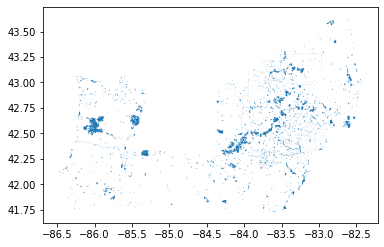

In [8]:
# Test to ensure geometry still intact after reducing number of columns
gdf.plot()

In [9]:
gdf.head()

,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name,geometry
0,State,State,89.275536,Fee,Nature Preserve,Conservation,Indiana,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-85.18006 41.75962, -85.18006 41.759..."
1,County,County,388.168381,Fee,Park,Recreation,Indiana,County Land,County Land,"POLYGON ((-86.26576 41.76046, -86.26408 41.760..."
2,Local,County,32.821328,Fee,Park,Recreation,Indiana,City Land,County Land,"POLYGON ((-86.25326 41.76047, -86.25326 41.760..."
3,State,State,648.172953,Fee,Botanical/Arboretum Garden,Conservation,Michigan,Other or Unknown State Land,Other or Unknown State Land,"POLYGON ((-84.09905 42.03655, -84.09852 42.021..."
4,County,County,1.693454,Fee,Park,Recreation,Michigan,County Land,County Land,"POLYGON ((-84.46998 42.08453, -84.47048 42.084..."


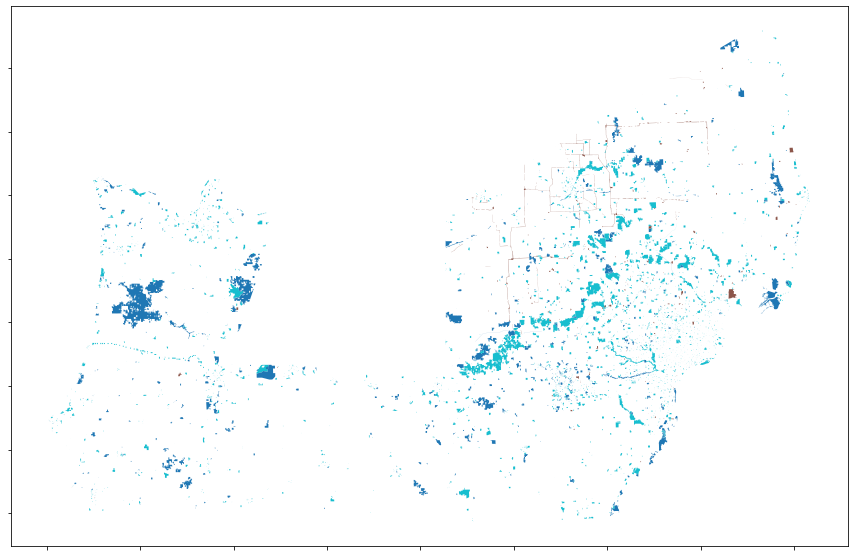

In [10]:
# Plot public lands locations
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, column='mgmt_type');

In [11]:
# now get royce treaty layer from AGOL
treatyID = 'a6deb9880f84418ea0364d4f153a65d1'
gdf2 = FeatServiceToGDF(gis, treatyID)

Downloading: ROYCE2 to /data directory
Export Format (Shapefile, CSV, GeoJson, KML, Excel): Shapefile
list of Files extracted to: /data/ROYCE2
['ROYCE2.dbf', 'ROYCE2.prj', 'ROYCE2.cpg', 'ROYCE2.shp', 'ROYCE2.shx']
GeoDataFrame Returned!


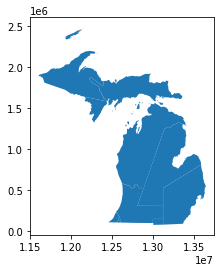

In [12]:
# Plotting treaty areas works fine
gdf2.plot()

In [13]:
# Keep only NHBP Ceded Territories
treaties = ['Detroit Treaty 1807','CHICAGO TREATY1821','Foot of the Rapids 1817']
gdf2 = gdf2[(gdf2['NAME']==treaties[0]) | (gdf2['NAME']==treaties[1]) | (gdf2['NAME']==treaties[2])]
gdf2.head()

,NAME,TYPE,TRIBES,YEAR,NOTES,geometry
1,Detroit Treaty 1807,County,None,None,None,"MULTIPOLYGON (((13585015.287 392516.475, 13584..."
3,Foot of the Rapids 1817,County,None,None,None,"POLYGON ((13123673.905 145270.026, 13123674.86..."
4,CHICAGO TREATY1821,County,None,None,None,"POLYGON ((12603488.299 100782.631, 12604719.68..."


In [14]:
# back to WGS84
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')

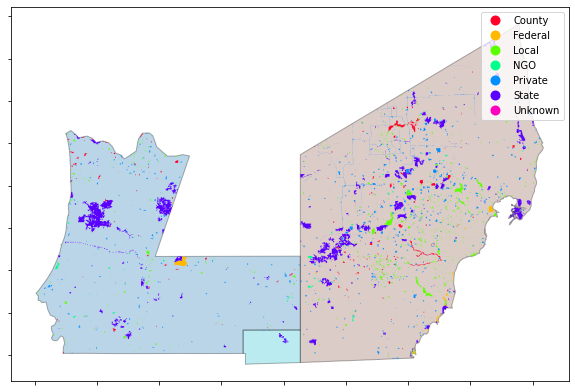

In [15]:
# Plotting both together, need to reproject gdf2 into EPSG:4326
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=0.3, edgecolor='k');
# gdf2.boundary.plot(ax=ax)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow')
#fig.savefig("pieCharts.png")

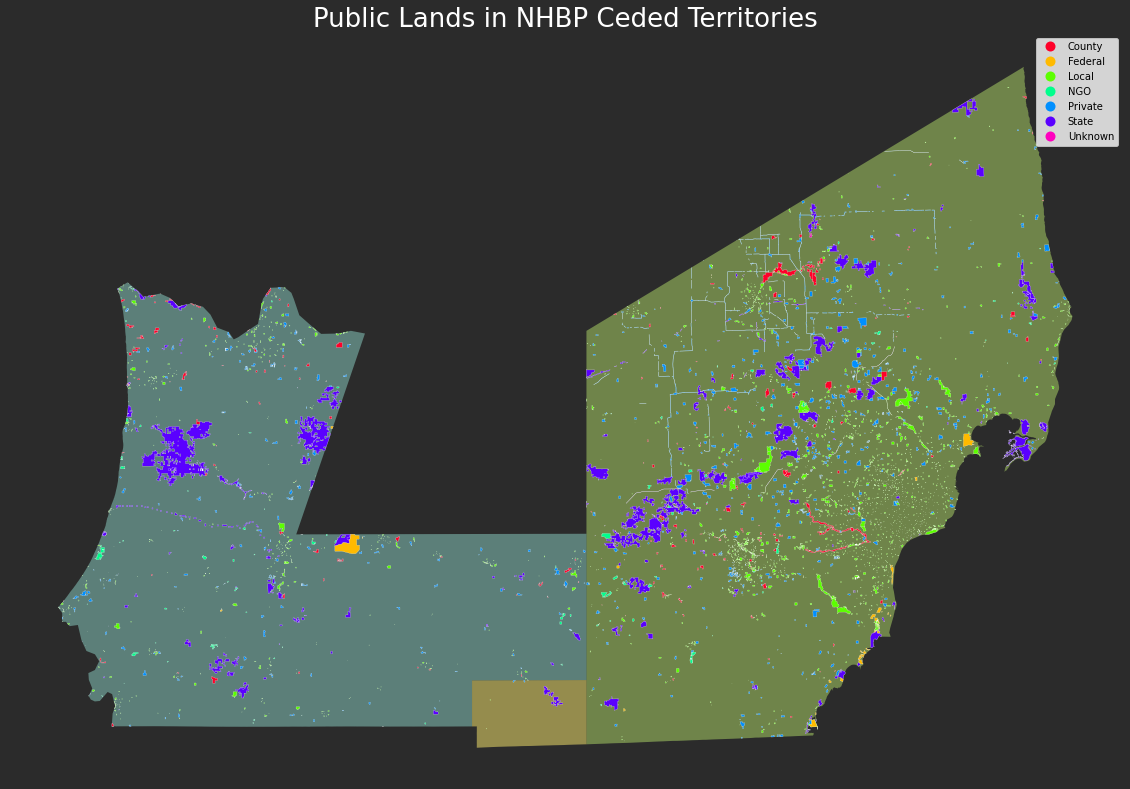

In [37]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#2b2b2b')
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.5, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()

plt.show()

In [19]:
gdf2 = gdf2.to_crs('EPSG:3857')
gdf = gdf.to_crs('EPSG:3857')

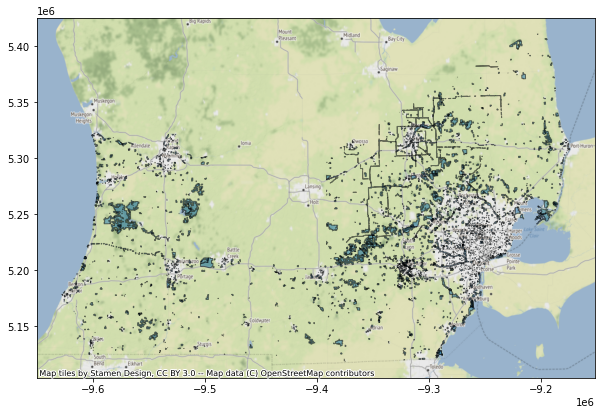

In [20]:
# Yeah here is public lands with the basemap!
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

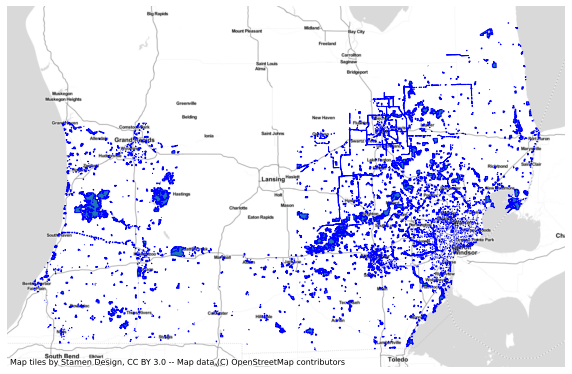

In [21]:
# Very cool, change the basemap type!
ax = gdf.plot(figsize=(10, 10), alpha=1, edgecolor='blue')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

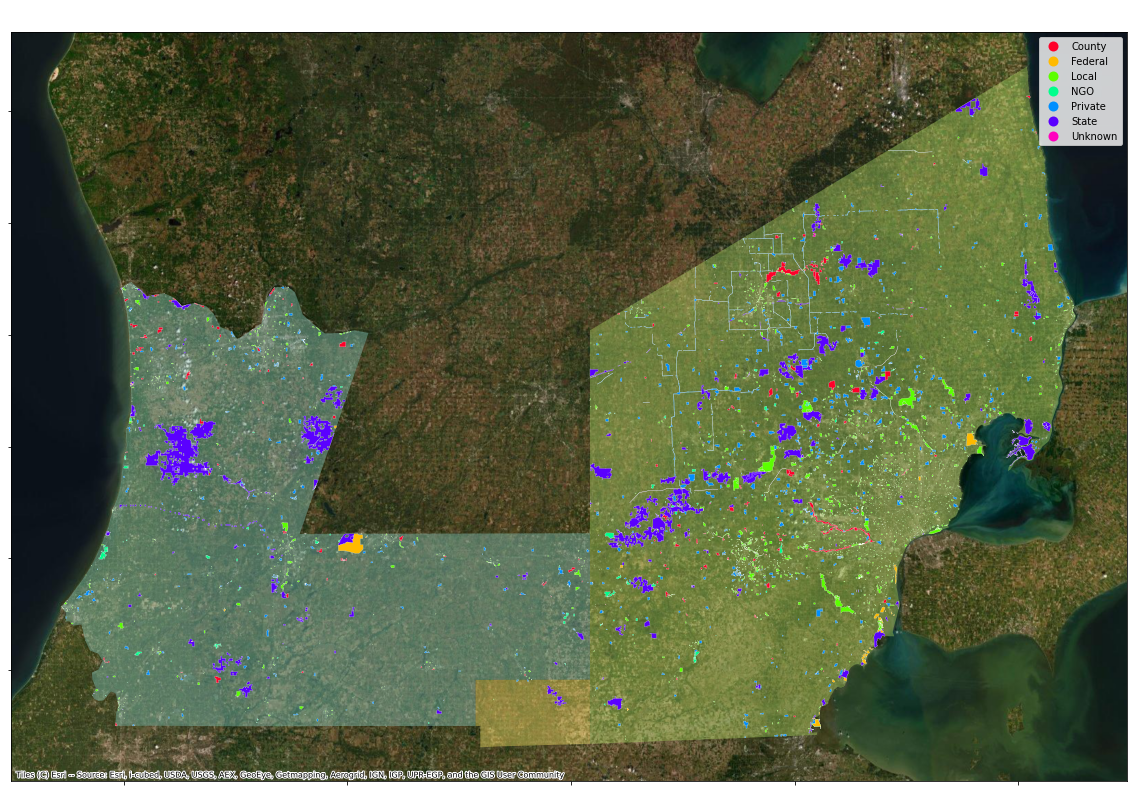

In [22]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15))
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.4, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
#ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

In [ ]:
# Export Clipped Public Lands as Excel, remove unneccesary geometry column
gdfExport = gdf.drop(['geometry'], axis='columns')
exportDataFrame(gdfExport, 'NHBP-PUBLIC-CEDED.xlsx')

## Appendices

In [ ]:
# Install and load libraries, may be able to remove some uneeded libraries
%%time 
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium
!pip install pygeos
!pip install arcgis
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install contextily
!pip install xlsxwriter
from pathlib import Path
import sys
import os
import getpass
from zipfile import ZipFile
import datetime as dt
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
from arcgis.gis import GIS, Item
from arcgis.env import active_gis
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer
from IPython.display import display
import contextily as ctx
from IPython.display import Image

In [3]:
def exportDataFrame(df, exportName):
    try:
      writer = pd.ExcelWriter(exportName, engine='xlsxwriter')
      df.to_excel(writer, sheet_name='Sheet1', index=False)
      writer.save()
      print(f'dataframe successfully exported as: {exportName}')
      #return df
    except:
      print('exportDataFrame function failed')

In [2]:
# Added functions November 4th
# Collection of all ArcGIS Python API Helper Functions
# user login functions, ask if user would like additional logins
def userLogin():
    userID = input(f'ArcGIS Online USER ID: ')
    passWord = getpass.getpass('PASSWORD: ')
    try:
        global gis
        gis = GIS("https://www.arcgis.com", userID, passWord)
        print(f'SUCCESS - CONNECTED TO: {gis.users.me.username} ACCOUNT as <gis>')
        print(gis)
        addUsers = input(f'Additional User Login(YES/NO)? ')
        if addUsers.upper() == 'YES':
            additionalUserLogin()
        else:
            print(f'YOU MAY NOW PROCEED...')
    except:
        print(f'ERROR DID NOT CONNECT TO: {userID}')

def additionalUserLogin():
    userID = input(f'ArcGIS Online USER ID: ')
    passWord = getpass.getpass('PASSWORD: ')
    try:
        global gis2
        gis2 = GIS("https://www.arcgis.com", userID, passWord)
        print(f'SUCCESS - CONNECTED TO: {gis2.users.me.username} ACCOUNT as <gis2>')
        print(gis2)
    except:
        print(f'ERROR DID NOT CONNECT TO: {userID}')

# get list of all owner AGOL items, print list with title, id, type, and categories
def getUserContent(gisInfo):
    try:
        my_content = gisInfo.content.search(query="owner:" + gisInfo.users.me.username, item_type="", max_items=200)
        for x in my_content:
            strMod = str(x.modified)
            stampInt = int(strMod[0:10])
            print(f'{x.title} - {x.id} - {x.type} - {x.categories} - {dt.datetime.fromtimestamp(stampInt)}')
    except:
        print('ERROR could not get user content')

# Clone item using id of item passed to function
def cloneItem(gisInfo, gisInfo2, cloneID):    
    try:
        itemToClone = gisInfo.content.get(cloneID)
        print('Cloning:' + itemToClone.title + ' - ' + itemToClone.id + ' -',itemToClone.type)
        clonedItem = gisInfo2.content.clone_items(items=[itemToClone])
        print(f'Cloned Item: {clonedItem[0]}')
        #return clonedItem
    except:
        print('ERROR Could Not Clone')

# updated searchByKeywords, returns LIST of items 8-14-2020
def searchByKeywords(gisInfo, searchKeywords):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type='', max_items=50)
        x = 0
        for z in searchContent:
          strMod = str(z.modified)
          stampInt = int(strMod[0:10])
          print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
          x += 1
        return searchContent
    except:
        print('ERROR Search not Successful')

# find item by keywords and display visual card
def searchByKeyViz(gisInfo, searchKeywords):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type='', max_items=50)
        for z in searchContent:
            print(f'title: {z.title} - itemID: {z.id} - type: {z.type}')
            display(z)
    except:
        print('ERROR Search not Successful')
        
# return all keys and values for item when passed itemID string
def getItemKeysValues(gisInfo, idString):
    try:
        getFeature = gisInfo.content.get(idString)
        for key, value in getFeature.items():
            print(key,': ', value)
    except:
        print('ERROR GET Keys/Values not Successful')
        
# takes itemID and gets and returns layerObject if exist, otherwise 'no layers found'
def getLayers(gisInfo, idString):
    getFeature = gisInfo.content.get(idString)
    try:
        featureLayers = getFeature.layers
        z = 0 
        for x in featureLayers:
            print(f'Layer {z}: {x}')
            z += 1
    except:
        print('no layers found')
    return featureLayers

# supply feature layer itemID, and the layer number to display table head 
def getLayerTable(gisInfo, idString, layerNum):
    try:
        layerOutput = getLayers(gisInfo, idString)
        queryLayer = layerOutput[layerNum].query()
        display(queryLayer.sdf.head())
    except:
        print('ERROR no Layers Found')
        
# delete item by itemID
def deleteItem(gisInfo, idString):
    itemToDelete = gisInfo.content.get(idString)
    display(itemToDelete)
    delQuest = input(f'Are you sure you want to delete: {itemToDelete.title}')
    try:
        if delQuest.upper() == 'YES':
            print(f'DELETING: {itemToDelete.title}')
            itemToDelete.delete()
        else:
            print(f'NOT DELETING: {itemToDelete.title}')
    except:
        print(f'ERROR failed to DELETE: {itemToDelete.title}')

# delete multiple items by searchByKeywords() returned LIST 8-14-2020
def delMultiple(gisInfo, itemList):
  try:
    print('List of Items to be Deleted: ')
    for z in itemList:
          strMod = str(z.modified)
          stampInt = int(strMod[0:10])
          print(f'{z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
    delQuest = input(f'SURE YOU WANT TO DELETE THESE?!?!?')
    if delQuest.upper() == 'YES':
      for z in itemList:
          print(f'DELETING {z.title}')
          itemToDelete = gisInfo.content.get(z.id)
          itemToDelete.delete()
      print('<FINISHED DELETION PROCESS>')
    else:
      print(f'NOT DELETING!')
  except:
      print(f'ERROR failed to DELETE: {itemToDelete.title}')

# List all user Dashboards and Dashboard Webmmaps
def ListAllDashWebmaps(gisInfo):
  source_admin_inventory = get_user_items(gisInfo, gisInfo.users.me)
  x = 0
  try:
    for dashboard in source_admin_inventory['Dashboard']:
        print(x, dashboard)
        dashWebmap = get_dash_wm(gisInfo, dashboard)
        print(dashWebmap)
        x += 1
  except:
    print("ERROR COULD NOT LIST DASHBOARDS") 

# generic function update targetLayer Features based on Table Records
def updateLayFeatFromTable(gisInfo, targetLayerID, matchAttrib, targetAttrib, sourceAttrib):
  try:
    getLayers = gisInfo.content.get(targetLayerID)
    targetLayer = getLayers.layers
    layerFeatures = targetLayer[0].query()
    sourceTable = getLayers.tables
    tableFeatures = sourceTable[0].query()
    for tableFeature in tableFeatures:
      tableFeatureID = tableFeature.attributes[matchAttrib]
      for layerFeature in layerFeatures:
        layerFeatureID = layerFeature.attributes[matchAttrib]
        if tableFeatureID == layerFeatureID:
          targetValue = tableFeature.attributes[sourceAttrib]
          layerFeature.set_value(targetAttrib, targetValue)
          print(f'feature: {layerFeatureID} from tableFeature: {tableFeatureID} set {targetAttrib} as: {targetValue}')
    layerEdits = targetLayer[0].edit_features(updates=layerFeatures)
    editCounter = 0
    for edits in layerEdits['updateResults']:
      editCounter+=1
    print(f'updated {getLayers.title} with {editCounter} edits from {getLayers.tables[0]}')
  except:
    print(f'update features failed for {getLayers.title}')
  
# generic function update targetLayer Features based on Table Record, adds break list for parameter categories mapping/analysis
# 8-14 Updated to screen for sampling records with blank values: 'None'
def updateLayFeatFromTableBreaks(gisInfo, targetLayerID, matchAttrib, targetAttrib, sourceAttrib, breaksList):
  try:
    getLayers = gisInfo.content.get(targetLayerID)
    targetLayer = getLayers.layers
    layerFeatures = targetLayer[0].query()
    sourceTable = getLayers.tables
    tableFeatures = sourceTable[0].query()
    for tableFeature in tableFeatures:
      #tableFeatureID = tableFeature.attributes[matchAttrib]
      print(tableFeature.attributes['WATER_TEMP'] is None)
      if (tableFeature.attributes['WATER_TEMP'] is None) != True:
        tableFeatureID = tableFeature.attributes[matchAttrib]
        for layerFeature in layerFeatures:
          layerFeatureID = layerFeature.attributes[matchAttrib]
          if tableFeatureID == layerFeatureID:
            targetValue = tableFeature.attributes[sourceAttrib]
            x = 1
            for breakVal in breaksList:
              if targetValue > breakVal:
                print('none')
              else:
                layerFeature.set_value(targetAttrib, x)
                print(f'feature: {layerFeatureID} from tableFeature: {tableFeatureID} set {targetAttrib}: {targetValue} as: {x}')
                break
              x+=1
    layerEdits = targetLayer[0].edit_features(updates=layerFeatures)
    editCounter = 0
    for edits in layerEdits['updateResults']:
      editCounter+=1
    # hide REST infor for updated layers and tables
    # print(f'updated {getLayers.title} with {editCounter} edits from {getLayers.tables[0]}')
    print(f'updated {getLayers.title} with {editCounter} edits')
  except:
    print(f'update features failed for {getLayers.title}')

# download Feature Layer data from AGOL, unzip contents to folder with item.title name
# Export Formats: Shapefile | CSV | File Geodatabase | Feature Collection | GeoJson | Scene Package | KML | Excel
def downloadItem(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        downloadExport = downloadData.export(title=downloadData.title, export_format="CSV")
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
    except:
        print('ERROR DOWNLOAD did not workings!')

def searchItem(gisInfo, searchKeywords, itemType):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type=itemType, max_items=25)
        if itemType == 'Feature Service':
            x = 0
            print(f'<Search Query for {searchKeywords}>')
            for z in searchContent:
                strMod = str(z.modified)
                stampInt = int(strMod[0:10])
                print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
                x += 1
            layInd = int(input(f'Index of selected Feature Layer: '))
            addLayer = gisInfo.content.get(searchContent[layInd].id)
            return addLayer
        elif itemType == 'Web Map':
            x = 0
            print(f'<Search Query for {searchKeywords}>')
            for z in searchContent:
                strMod = str(z.modified)
                stampInt = int(strMod[0:10])
                print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
                x += 1
            layInd = int(input(f'Index of selected Feature Layer: ')) or 'NONE'
            #print(searchContent[layInd])
            mapReturn = searchContent[layInd]
            return mapReturn
    except:
        print('ERROR Search not Successful')
        
def quickMap():
  mapType = input(f'(YES) for QuickMap (NO) for Existing: ')
  if mapType.upper() == 'NO':
    mapSize = ['480px','720px','960px']
    print(f'<You entered {mapType} please login below>')
    userLogin() 
    mapKeywords = input(f'Name of WebMap to Search for: ') or ''
    mapObj = searchItem(gis,mapKeywords,'Web Map')
    map = gis.map(mapObj)
    sizeIn = int(input(f'MAP SIZE (0)SMALL (1)MEDIUM (2)HUGE: '))
    map.layout.height = mapSize[sizeIn]
    display(map)
  else:
    print(f'<You entered {mapType} Opening QuickMap>')
    mapList = ['topo','hybrid','streets','dark-gray','terrain']
    mapDimen = ['2D','3D']
    mapSize = ['480px','720px','960px']
    mapLoc = input(f'Location (default=Michigan): ') or 'Michigan'
    mapBaseNum = input(f'Basemap (default=topo (1=hybrid,2=streets,3=dark-gray,4=terrain): ') or 0
    mapDimIn = input(f'ENTER (1) for 3D Map: ') or 0
    atlasLayers = input(f'Layers from Living Atlas(Enter for None): ') or 'NONE'
    gisNone = GIS()
    map = gisNone.map(mapLoc)
    map.basemap = mapList[int(mapBaseNum)]
    if atlasLayers != 'NONE':
        layerDisplay = searchItem(gisNone, atlasLayers,'Feature Service')
        for layrs in layerDisplay.layers:
            map.add_layer(layrs)
    map.mode = mapDimen[int(mapDimIn)]
    sizeIn = int(input(f'MAP SIZE (0)SMALL (1)MEDIUM (2)HUGE: '))
    map.layout.height = mapSize[sizeIn]
    display(map)

# Delete all features from selected Feature Service, may need more debugging
def delAllFeatures(gisInfo, idString):
    delFeatures = gisInfo.content.get(idString)
    display(delFeatures)
    delQuest = input(f'Are you sure you want to delete all the feature in? {delFeatures.title}')
    try:
        if delQuest.upper() == 'YES':
            print('in loop')
            print(f'DELETING ALL FEATURES IN: {delFeatures.title}')
            featDelRes = []
            targetLayer = delFeatures.layers
            layerFeatures = targetLayer[0].query()
            for feature in layerFeatures:
              #print(f'features: {feature.attributes}')
              featDelRes.append(targetLayer[0].edit_features(deletes=str(feature.attributes['objectid'])))
            return featDelRes
        else:
            print(f'NOT DELETING: {delFeatures.title}')
    except:
        print(f'ERROR failed to DELETE: {delFeatures.title}')
      

# update download function to allow export format choice
# added Nov 4th 2020
def downItemFormat(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        expForm = input(f'Export Format (Shapefile, CSV, GeoJson, KML, Excel): ')
        downloadExport = downloadData.export(title=downloadData.title, export_format=expForm)
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
    except:
        print('ERROR DOWNLOAD did not workings!')

# update download function to allow export format choice
# November 3rd, take it all the way from Feature Service to Geodataframe!
def FeatServiceToGDF(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        expForm = input(f'Export Format (Shapefile, CSV, GeoJson, KML, Excel): ')
        downloadExport = downloadData.export(title=downloadData.title, export_format=expForm)
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
        gdf = gpd.read_file(extractPath)
        print(f'GeoDataFrame Returned!')
        return gdf
    except:
        print('ERROR DOWNLOAD did not workings!')

      
# *******ESRI pre-made helper functions********
def is_hosted(gisInfo, item):
    return [keyword for keyword in item.typeKeywords if "Hosted" in keyword] 

# Prints all layers in a webmap, very handy
def print_webmap_inventory(gisInfo, wm):
    wm_obj = WebMap(wm)
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        try:
            if is_hosted(Item(gisInfo, wm_layer['itemId'])):
                print(f"{' '*2}{wm_layer['title']:40}HOSTED{' ':5}"
                      f"{wm_layer['layerType']:20}{dict(wm_layer)['itemId']}")
            else:
                print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                      f"{wm_layer['layerType']:20}{wm_layer.id}") 
        except:
            print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                  f"{wm_layer['layerType']:20}{wm_layer.id}")
    print("\n")

def get_webmap_list(wm):
    wm_obj = WebMap(wm)
    wmList = []
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        # print(wm_layer.itemId)
        wmList.append(wm_layer.itemId)
    return(wmList)
    
def displayWebmapLayers(gisInfo, idList):
    for id in idList:
        displayLayer = gisInfo.content.get(id)
        display(displayLayer)

def get_user_items(gisInfo, user):
    user_inventory = {}
    user_items = gisInfo.content.search(query=f"* AND owner:{user.username}", 
                                           max_items=500)
    for item in user_items:
        if item.type not in user_inventory:
            user_inventory[item.type] = [i 
                                         for i in user_items 
                                         if i.type == item.type]
    return user_inventory

def print_user_inventory(inventory):
    for itype, ilist in inventory.items():
        try:
            print(f"{itype}\n{'-'*50}")
            for i in ilist:
                print(f"{' ':3}{i.title:50}")
            print("\n")
        except Exception as e:
            print(f"\t\tOperation failed on: {i.title}")
            print(f"\t\tException: {sys.exc_info()[1]}")
            continue
            
def get_dash_wm(gisInfo, dash):
    return [gisInfo.content.get(widget['itemId']) 
            for widget in dash.get_data()['widgets'] 
            if widget['type'] == "mapWidget"]